In [1]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
# print(os.listdir("../input"))

- <a href='#1'>1. Introduction to date and time</a>
    - <a href='#1.1'>1.1 Importing time series data</a>
    - <a href='#1.2'>1.2 Cleaning and preparing time series data</a>
    - <a href='#1.3'>1.3 Visualizing the datasets</a>
    - <a href='#1.4'>1.4 Timestamps and Periods</a>
    - <a href='#1.5'>1.5 Using date_range</a>
    - <a href='#1.6'>1.6 Using to_datetime</a>
    - <a href='#1.7'>1.7 Shifting and lags</a>
    - <a href='#1.8'>1.8 Resampling</a>
- <a href='#2'>2. Finance and Statistics</a>
    - <a href='#2.1'>2.1 Percent change</a>
    - <a href='#2.2'>2.2 Stock returns</a>
    - <a href='#2.3'>2.3 Absolute change in successive rows</a>
    - <a href='#2.4'>2.4 Comaring two or more time series</a>
    - <a href='#2.5'>2.5 Autocorrelation and Partial Autocorrelation</a>
- <a href='#3'>3. Time series decomposition and Random Walks</a>
    - <a href='#3.1'>3.1 Trends, Seasonality and Noise</a>
    - <a href='#3.2'>3.2 White Noise</a>
    - <a href='#3.3'>3.3 Random Walk</a>
    - <a href='#3.4'>3.4 Stationarity</a>
- <a href='#4'>4. Modelling using statsmodels</a>
    - <a href='#4.1'>4.1 AR models</a>
    - <a href='#4.2'>4.2 MA models</a>
    - <a href='#4.3'>4.3 ARMA models</a>
    - <a href='#4.4'>4.4 ARIMA models</a>
    - <a href='#4.5'>4.5 VAR models</a>
    - <a href='#4.6'>4.6 State space methods</a>
        - <a href='#4.6.1'>4.6.1 SARIMA models</a>
        - <a href='#4.6.2'>4.6.2 Unobserved components</a>
        - <a href='#4.6.3'>4.6.3 Dynamic Factor models</a>

# <a id='1'>1. Introduction to date and time</a>

## <a id='1.1'>1.1 Importing time series data</a>

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Google  Stocks Data

In [2]:
ge = pd.read_csv('GE_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
ge.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,35.10,35.40,34.80,35.37,33221400,GE
2006-01-04,35.35,35.40,35.10,35.32,24017300,GE
2006-01-05,35.27,35.35,35.10,35.23,18860400,GE
2006-01-06,35.38,35.53,35.19,35.47,22085300,GE
2006-01-09,35.40,35.43,35.24,35.38,20716900,GE


## <a id='1.2'>1.2 Cleaning and preparing time series data</a>

### How to prepare data?
GE stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using **fillna()** method with **ffill** parameter which propagates last valid observation to fill gaps

In [3]:
ge_check = ge.iloc[1:]
ge_check = ge_check.fillna(method='ffill')
print(ge_check.head())
is_null = ge_check.isnull().values.any()
print(ge_check.isnull().sum())
print(is_null)


             Open   High    Low  Close    Volume Name
Date                                                 
2006-01-04  35.35  35.40  35.10  35.32  24017300   GE
2006-01-05  35.27  35.35  35.10  35.23  18860400   GE
2006-01-06  35.38  35.53  35.19  35.47  22085300   GE
2006-01-09  35.40  35.43  35.24  35.38  20716900   GE
2006-01-10  35.27  35.31  35.05  35.19  21044000   GE
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64
False


In [4]:
ge = ge_check


## <a id='1.3'>1.3 Visualizing the datasets</a>

humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

In [5]:
ge['2017':'2019']

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-01-03,31.67,31.84,31.40,31.69,32149537,GE
2017-01-04,31.75,31.83,31.62,31.70,21442858,GE
2017-01-05,31.57,31.75,31.31,31.52,25856823,GE
2017-01-06,31.58,31.77,31.36,31.61,22120800,GE
2017-01-09,31.64,31.66,31.43,31.46,21262544,GE
...,...,...,...,...,...,...
2017-12-22,17.51,17.56,17.40,17.50,46370351,GE
2017-12-26,17.45,17.66,17.40,17.43,55337926,GE
2017-12-27,17.46,17.63,17.31,17.38,60126681,GE


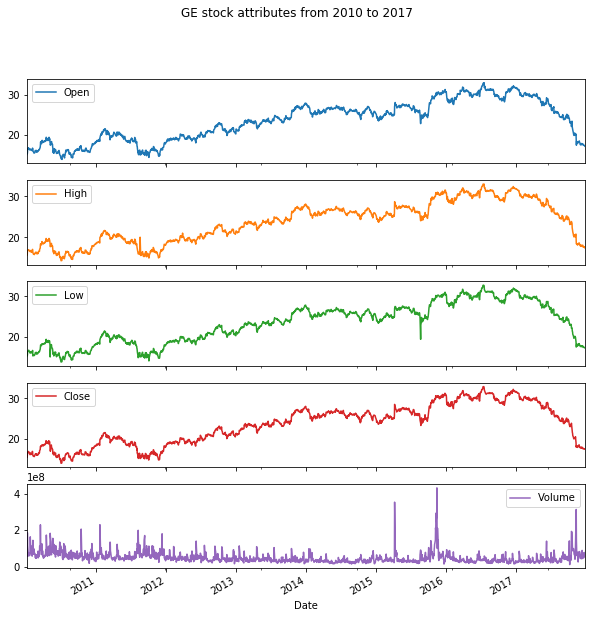

In [6]:

ge['2010':'2018'].plot(subplots=True, figsize=(10,10))
plt.suptitle('GE stock attributes from 2010 to 2017')
#plt.savefig('stocks.png')
plt.show()

## <a id='1.4'>1.4 Timestamps and Periods</a>

### What are timestamps and periods and how are they useful?
Timestamps are used to represent a point in time. Periods represent an interval in time. Periods can used to check if a specific event in the given period. They can also be converted to each other's form.

In [7]:
# Creating a Timestamp
timestamp = pd.Timestamp(2018, 1, 1, 12)
timestamp

Timestamp('2018-01-01 12:00:00')

In [8]:
# Creating a period
period = pd.Period('2018-01-01')
period

Period('2018-01-01', 'D')

In [9]:
# Checking if the given timestamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [10]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

Period('2018-01-01 12:00', 'H')

In [11]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq='H', how='start')
new_timestamp

Timestamp('2018-01-01 00:00:00')

## <a id='1.5'>1.5 Using date_range</a>

### What is date_range and how is it useful?
**date_range** is a method that returns  a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [12]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [13]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start='1/1/18', end='1/1/19', freq='M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [14]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [15]:
# Creating a datetimeindex specifying start date , end date and periods
dr4 = pd.date_range(start='2013-04-24', end='2014-11-27', periods=3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-09', '2014-11-27'], dtype='datetime64[ns]', freq=None)

## <a id='1.6'>1.6 Using to_datetime</a> 

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [16]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2, 3], 'day': [4, 5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [17]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [18]:
df = pd.to_datetime('01-01-2017')
df

Timestamp('2017-01-01 00:00:00')

## <a id='#1.7'>1.7 Resampling</a>
**Upsampling** - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

**Downsampling** - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.


# <a id='2'>2. Finance and statistics</a>

## <a id='2.1'>2.1 Percent change</a>

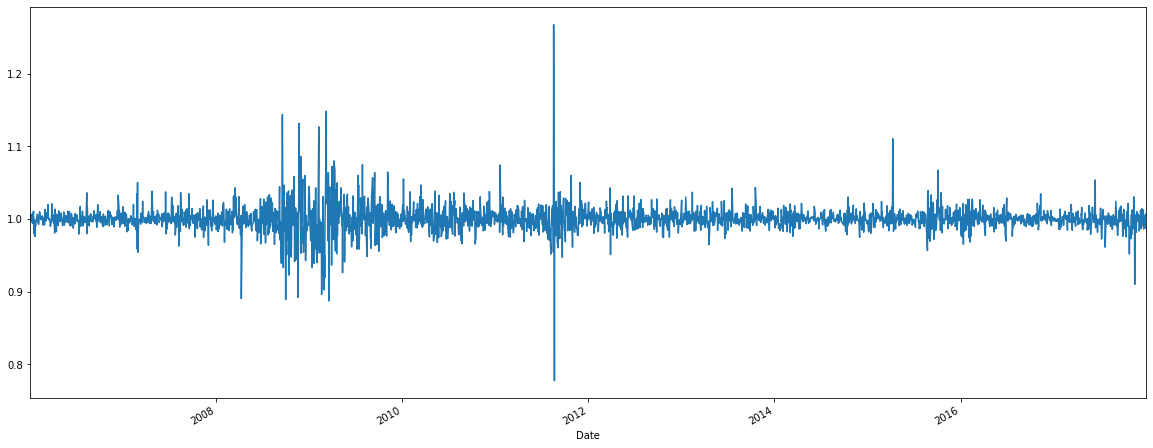

In [19]:
ge['Change'] = ge.High.div(ge.High.shift())
ge['Change'].plot(figsize=(20,8))

## <a id='2.2'>2.2 Stock returns</a> 

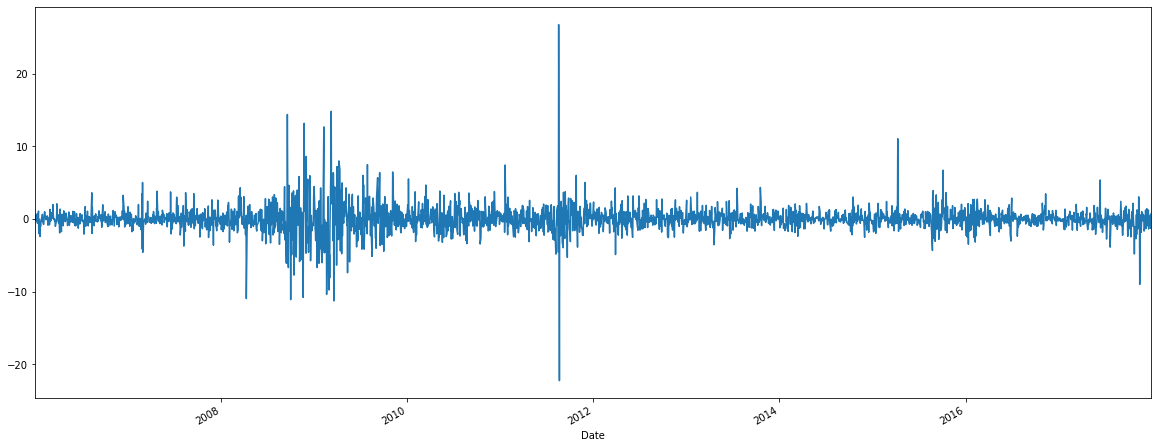

In [20]:
ge['Return'] = ge.Change.sub(1).mul(100)
ge['Return'].plot(figsize=(20,8))

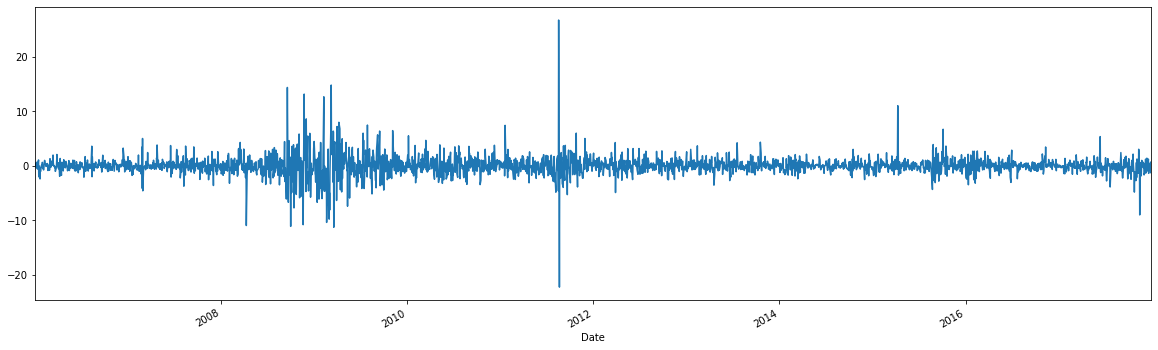

In [21]:
ge.High.pct_change().mul(100).plot(figsize=(20,6)) # Another way to calculate returns

## <a id='2.3'>2.3 Absolute change in successive rows</a>

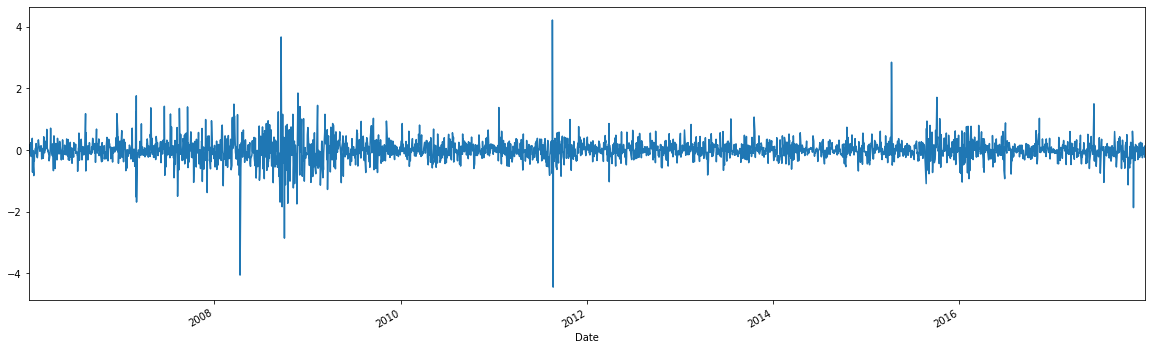

In [22]:
ge.High.diff().plot(figsize=(20,6))

## <a id='2.4'>2.4 Comaring two or more time series</a> 

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared.

In [23]:
# We choose microsoft stocks to compare them with ge
microsoft = pd.read_csv('MSFT_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])

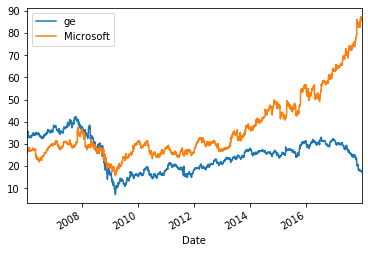

In [24]:
# Plotting before normalization
ge.High.plot()
microsoft.High.plot()
plt.legend(['ge','Microsoft'])
plt.show()

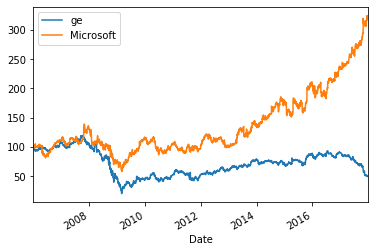

In [25]:
# Normalizing and comparison
# Both stocks start from 100
normalized_ge = ge.High.div(ge.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)
normalized_ge.plot()
normalized_microsoft.plot()
plt.legend(['ge','Microsoft'])
plt.show()

You can clearly see how ge outperforms microsoft over time.

## <a id='2.5'>2.5 Window functions</a>
Window functions are used to identify sub periods, calculates sub-metrics of sub-periods.

**Rolling** - Same size and sliding

**Expanding** - Contains all prior values

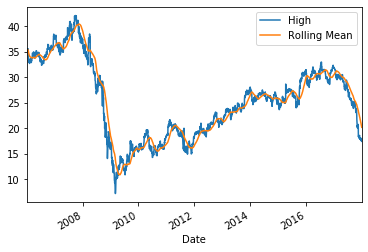

In [26]:
# Rolling window functions
rolling_ge = ge.High.rolling('90D').mean()
ge.High.plot()
rolling_ge.plot()
plt.legend(['High','Rolling Mean'])
# Plotting a rolling mean of 90 day window with original High attribute of ge stocks
plt.show()

Now, observe that rolling mean plot is a smoother version of the original plot.

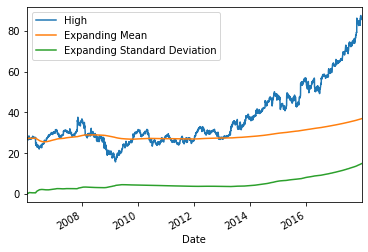

In [27]:
# Expanding window functions
microsoft_mean = microsoft.High.expanding().mean()
microsoft_std = microsoft.High.expanding().std()
microsoft.High.plot()
microsoft_mean.plot()
microsoft_std.plot()
plt.legend(['High','Expanding Mean','Expanding Standard Deviation'])
plt.show()

## <a id='2.8'>2.8 Autocorrelation and Partial Autocorrelation</a>
* Autocorrelation - The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.
* Partial Autocorrelation - The partial autocorrelation function can be interpreted as a regression of the series against its past lags.  The terms can be interpreted the same way as a standard  linear regression, that is the contribution of a change in that particular lag while holding others constant. 

Source: [Quora](https://www.quora.com/What-is-the-difference-among-auto-correlation-partial-auto-correlation-and-inverse-auto-correlation-while-modelling-an-ARIMA-series)

## Autocorrelation

In [28]:
ge.head()

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2006-01-04,35.35,35.40,35.10,35.32,24017300,GE,NaN,NaN
2006-01-05,35.27,35.35,35.10,35.23,18860400,GE,0.998588,-0.141243
2006-01-06,35.38,35.53,35.19,35.47,22085300,GE,1.005092,0.509194
2006-01-09,35.40,35.43,35.24,35.38,20716900,GE,0.997185,-0.281452
2006-01-10,35.27,35.31,35.05,35.19,21044000,GE,0.996613,-0.338696


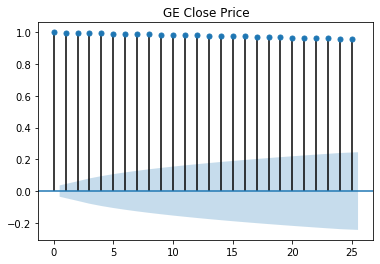

In [29]:
# Autocorrelation of humidity of San Diego
plot_acf(ge["Close"],lags=25,title="GE Close Price")
plt.show()

 As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

## Partial Autocorrelation

# Partial Autocorrelation of humidity of San Diego
plot_pacf(humidity["San Diego"],lags=25)
plt.show()

Though it is statistically signficant, partial autocorrelation after first 2 lags is very low.

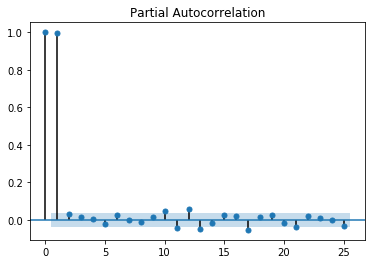

In [30]:
# Partial Autocorrelation of closing price of microsoft stocks
plot_pacf(ge["Close"],lags=25)
plt.show()

Here, only 0th, 1st and 20th lag are statistically significant.

# <a id='3'>3. Time series decomposition and Random walks</a>

## <a id='3.1'>3.1. Trends, seasonality and noise</a>
These are the components of a time series
* Trend - Consistent upwards or downwards slope of a time series
* Seasonality - Clear periodic pattern of a time series(like sine funtion)
* Noise - Outliers or missing values

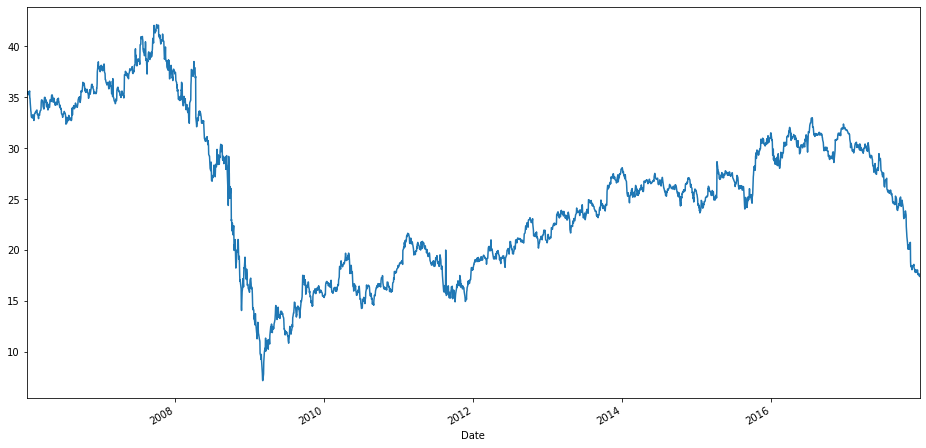

In [31]:
# Let's take ge stocks High for this
ge["High"].plot(figsize=(16,8))

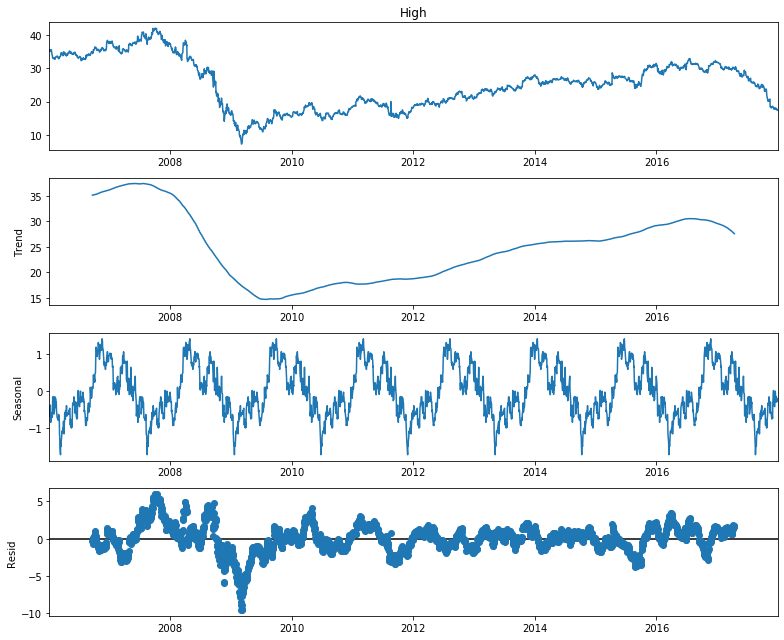

In [32]:
# Now, for decomposition...
rcParams['figure.figsize'] = 11, 9
decomposed_ge_volume = sm.tsa.seasonal_decompose(ge["High"],freq=360) # The frequncy is annual
figure = decomposed_ge_volume.plot()
plt.show()

* There is clearly an upward trend in the above plot.
* You can also see the uniform seasonal change.
* Non-uniform noise that represent outliers and missing values

## <a id='3.2'>3.2. White noise</a>
White noise has...
* Constant mean
* Constant variance
* Zero auto-correlation at all lags

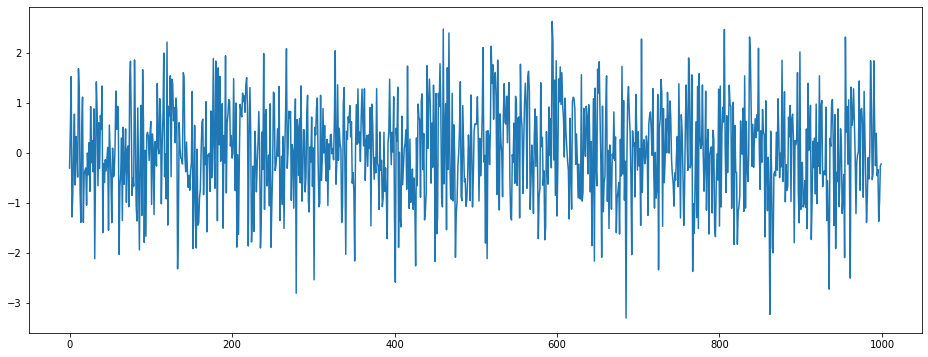

In [33]:
# Plotting white noise
rcParams['figure.figsize'] = 16, 6
white_noise = np.random.normal(loc=0, scale=1, size=1000)
# loc is mean, scale is variance
plt.plot(white_noise)

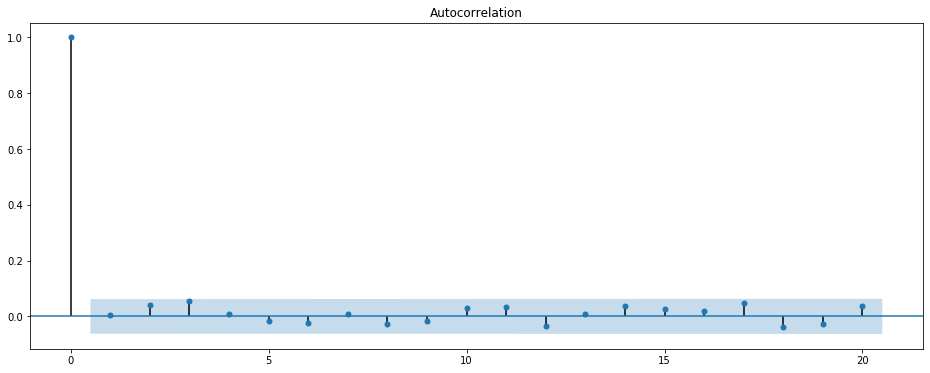

In [34]:
# Plotting autocorrelation of white noise
plot_acf(white_noise,lags=20)
plt.show()

See how all lags are statistically insigficant as they lie inside the confidence interval(shaded portion).

## <a id='3.3'>3.3. Random Walk</a>
A random walk is a mathematical object, known as a stochastic or random process, that describes a path that consists of a succession of random steps on some mathematical space such as the integers. 

In general if we talk about stocks, Today's Price = Yesterday's Price + Noise

# P<sub>t</sub> = P<sub>t-1</sub> + ε<sub>t</sub> 

Random walks can't be forecasted because well, noise is random.

Random Walk with Drift(drift(μ) is zero-mean)
#### P<sub>t</sub> - P<sub>t-1</sub> = μ + ε<sub>t</sub> 
<br>
Regression test for random walk 
#### P<sub>t</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
#### Equivalent to  P<sub>t</sub> - P<sub>t-1</sub> = α + βP<sub>t-1</sub> + ε<sub>t</sub>
<br>
Test:
#### H<sub>0</sub>: β = 1 (This is a random walk)
#### H<sub>1</sub>: β < 1 (This is not a random walk)
<br>
Dickey-Fuller Test:
#### H<sub>0</sub>: β = 0 (This is a random walk)
#### H<sub>1</sub>: β < 0 (This is not a random walk)

### Augmented Dickey-Fuller test
An augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. It is basically Dickey-Fuller test with more lagged changes on RHS.

In [35]:
# Augmented Dickey-Fuller test on volume of ge and microsoft stocks 
adf = adfuller(microsoft["Volume"])
print("p-value of microsoft: {}".format(float(adf[1])))
adf = adfuller(ge["Volume"])
print("p-value of ge: {}".format(float(adf[1])))

p-value of microsoft: 0.00032015252776519996
p-value of ge: 0.0002902171740801477


##### As microsoft has p-value 0.0003201525 which is less than 0.05, null hypothesis is rejected and this is not a random walk.
##### Now ge has p-value 0.00029021717408015047 which is more than 0.05, null hypothesis is rejected and this is not a  random walk.

### Generating a random walk

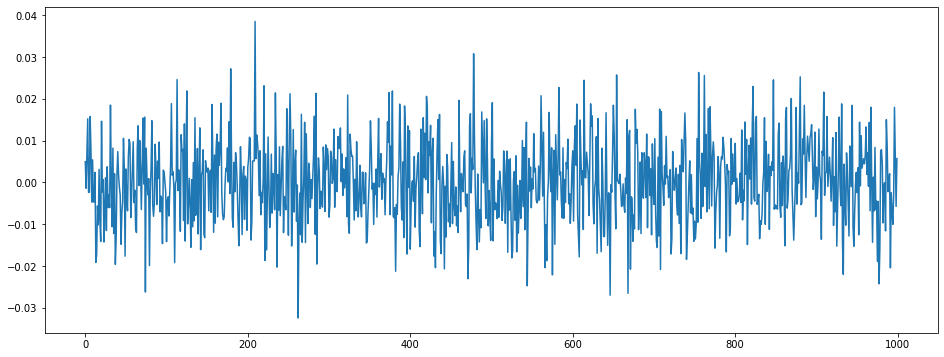

In [36]:
seed(42)
rcParams['figure.figsize'] = 16, 6
random_walk = normal(loc=0, scale=0.01, size=1000)
plt.plot(random_walk)
plt.show()

In [49]:
fig = ff.create_distplot([random_walk],['Random Walk'],bin_size=0.001)
iplot(fig, filename='Basic Distplot')

AttributeError: module 'plotly.validators.layout' has no attribute 'AngularAxisValidator'

## <a id='3.4'>3.4 Stationarity</a>
A stationary time series is one whose statistical properties such as mean, variance, autocorrelation, etc. are all constant over time.
* Strong stationarity:  is a stochastic process whose unconditional joint probability distribution does not change when shifted in time. Consequently, parameters such as mean and variance also do not change over time.
* Weak stationarity: is a process where mean, variance, autocorrelation are constant throughout the time

Stationarity is important as  non-stationary series that depend on time have too many parameters to account for when modelling the time series. diff() method can easily convert a non-stationary series to a stationary series.

We will try to decompose seasonal component of the above decomposed time series.

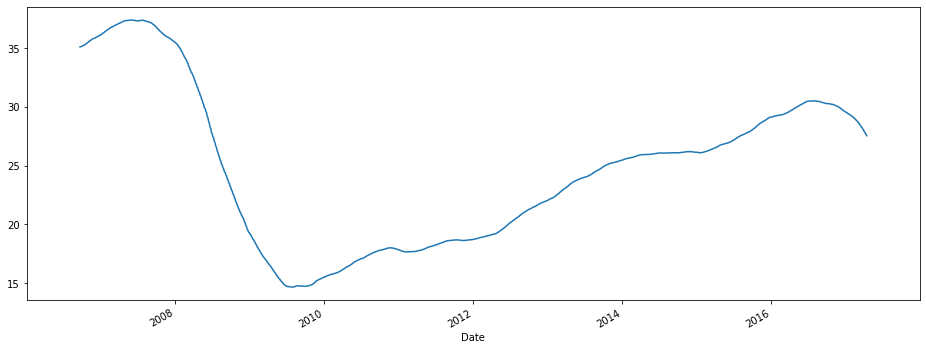

In [37]:
# The original non-stationary plot
decomposed_ge_volume.trend.plot()

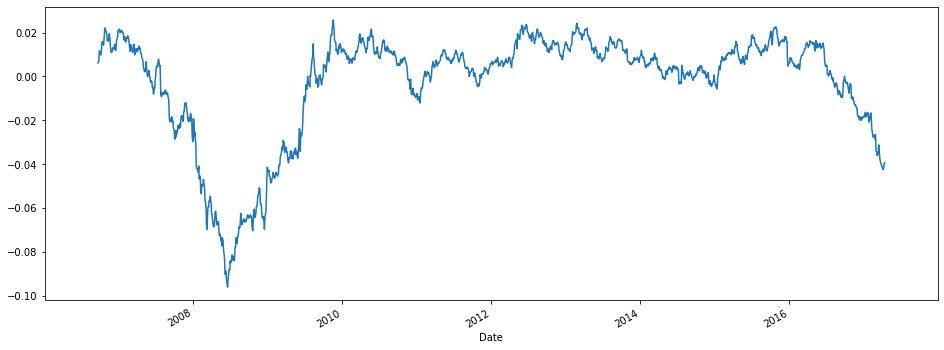

In [38]:
# The new stationary plot
decomposed_ge_volume.trend.diff().plot()

# <a id='4'>4. Modelling using statstools</a>

## <a id='4.1'>4.1 AR models</a>
 An autoregressive (AR) model is a representation of a type of random process; as such, it is used to describe certain time-varying processes in nature, economics, etc. The autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term); thus the model is in the form of a stochastic difference equation.
 #### AR(1) model
 R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ε<sub>t</sub>
 ##### As RHS has only one lagged value(R<sub>t-1</sub>)this is called AR model of order 1 where μ is mean and ε is noise at time t
 If ϕ = 1, it is random walk. Else if ϕ = 0, it is white noise. Else if -1 < ϕ < 1, it is stationary. If ϕ is -ve, there is men reversion. If ϕ is +ve, there is momentum.
 #### AR(2) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ε<sub>t</sub>
 #### AR(3) model
 R<sub>t</sub> = μ + ϕ<sub>1</sub>R<sub>t-1</sub> + ϕ<sub>2</sub>R<sub>t-2</sub> + ϕ<sub>3</sub>R<sub>t-3</sub> + ε<sub>t</sub>

ϕ is around 0.9 which is what we chose as AR parameter in our first simulated model.


# Predicting closing prices of ge

## <a id='4.2'>4.2 MA models</a>
The moving-average (MA) model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.
#### MA(1) model
R<sub>t</sub> = μ  +  ϵ<sub>t</sub>1 + θϵ<sub>t-1</sub>

It translates to Today's returns = mean + today's noise + yesterday's noise
##### As there is only 1 lagged value in RHS, it is an MA model of order 1

Now, for ARMA models.

## <a id='4.3'>4.3 ARMA models</a>
Autoregressive–moving-average (ARMA) models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.
### ARMA(1,1) model
### R<sub>t</sub> = μ + ϕR<sub>t-1</sub> + ϵ<sub>t</sub> + θϵ<sub>t-1</sub> 
Basically, Today's return = mean + Yesterday's return + noise + yesterday's noise.

## Prediction using ARMA models
I am not simulating any model because it's quite similar to AR and MA models. Just  forecasting and predictions for this one.

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55850.675
Method:                       css-mle   S.D. of innovations       26342089.672
Date:                Thu, 07 May 2020   AIC                         111717.350
Time:                        15:08:19   BIC                         111765.448
Sample:                             0   HQIC                        111734.645
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.727e+04   9.32e+04      0.185      0.853   -1.65e+05       2e+05
ar.L1.y       -0.3959      0.026    -15.248      0.000      -0.447      -0.345
ar.L2.y       -0.5654      0.024    -23.753      0.0

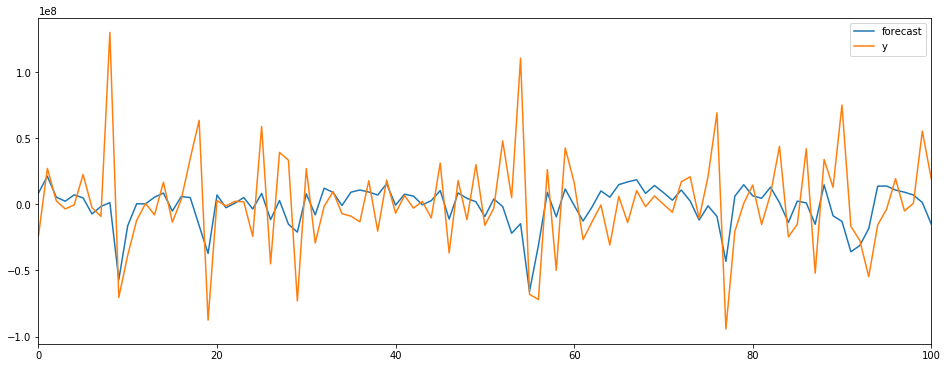

In [39]:
# Forecasting and predicting ge stocks volume
model = ARMA(ge["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [40]:
rmse = math.sqrt(mean_squared_error(ge["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 46919398.191938125.


                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood               -1409.044
Method:                       css-mle   S.D. of innovations              0.386
Date:                Thu, 07 May 2020   AIC                           2834.089
Time:                        15:08:23   BIC                           2882.187
Sample:                             0   HQIC                          2851.384
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      0.007     -0.859      0.391      -0.019       0.008
ar.L1.y       -1.6790      0.028    -59.250      0.000      -1.735      -1.623
ar.L2.y       -1.6547      0.033    -49.491      0.0

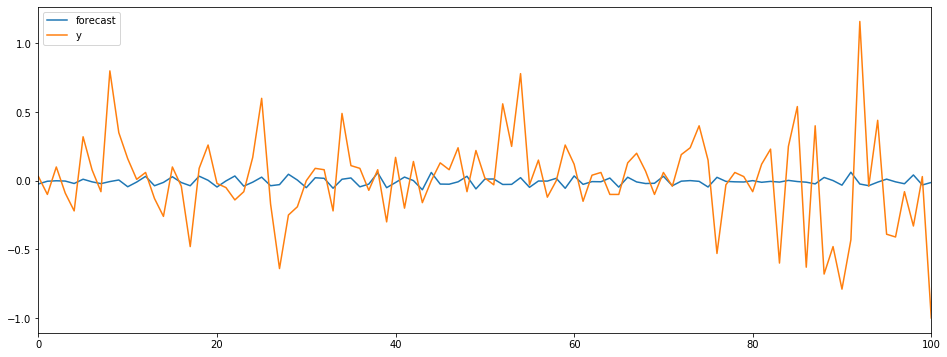

In [41]:
# Forecasting and predicting ge close price
model = ARMA(ge["Close"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

## <a id='4.4'>4.4 ARIMA models</a>
An autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.
ARIMA model is of the form: ARIMA(p,d,q): p is AR parameter, d is differential parameter, q is MA parameter
### ARIMA(1,0,0)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub>**
### ARIMA(1,0,1)
**y<sub>t</sub> = a<sub>1</sub>y<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>**
### ARIMA(1,1,1)
**Δy<sub>t</sub> = a<sub>1</sub>Δy<sub>t-1</sub> + ϵ<sub>t</sub> + b<sub>1</sub>ϵ<sub>t-1</sub>** where **Δy<sub>t</sub> = y<sub>t</sub> - y<sub>t-1</sub>**

## Prediction using ARIMA model

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56697.318
Method:                       css-mle   S.D. of innovations       35094250.374
Date:                Thu, 07 May 2020   AIC                         113402.637
Time:                        15:08:25   BIC                         113426.685
Sample:                             1   HQIC                        113411.284
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6752.2476   2.87e+05      0.023      0.981   -5.57e+05     5.7e+05
ar.L1.D.y     -0.8049      0.017    -48.697      0.000      -0.837      -0.773
ar.L2.D.y     -0.4185      0.017    -25.326      0.0

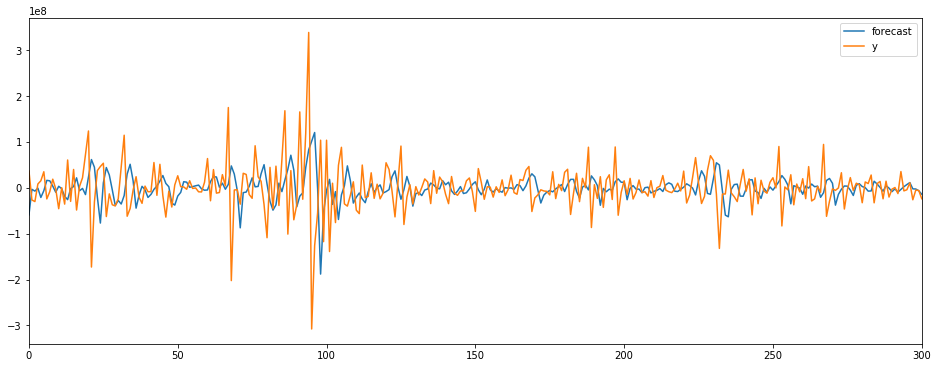

In [42]:
# Predicting the ge stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(ge["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [43]:
rmse = math.sqrt(mean_squared_error(ge["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 104683310.9585662.


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56697.318
Method:                       css-mle   S.D. of innovations       35094250.374
Date:                Thu, 07 May 2020   AIC                         113402.637
Time:                        15:08:26   BIC                         113426.685
Sample:                             1   HQIC                        113411.284
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6752.2476   2.87e+05      0.023      0.981   -5.57e+05     5.7e+05
ar.L1.D.y     -0.8049      0.017    -48.697      0.000      -0.837      -0.773
ar.L2.D.y     -0.4185      0.017    -25.326      0.0

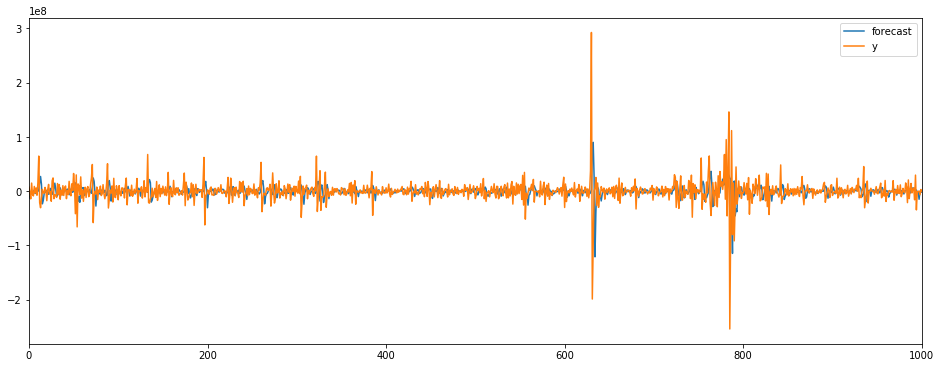

In [44]:
# Predicting the ge stocks volume
rcParams['figure.figsize'] = 16, 6
model = ARIMA(ge["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=1700, end=2700)
plt.show()

## <a id='4.5'>4.5 VAR models</a>
Vector autoregression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable. All variables in a VAR enter the model in the same way: each variable has an equation explaining its evolution based on its own lagged values, the lagged values of the other model variables, and an error term. VAR modeling does not require as much knowledge about the forces influencing a variable as do structural models with simultaneous equations: The only prior knowledge required is a list of variables which can be hypothesized to affect each other intertemporally.

<img src="http://gdurl.com/VvRm">

In [ ]:
# Predicting closing price of ge and microsoft
train_sample = pd.concat([ge["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

## <a id='4.6'>4.6 State Space methods</a>

A general state space model is of the form

y<sub>t</sub>=Z<sub>t</sub>α<sub>t</sub>+d<sub>t</sub>+ε<sub>t</sub>

α<sub>t</sub>=T<sub>t</sub>α<sub>t</sub>−1+c<sub>t</sub>+R<sub>t</sub>η<sub>t</sub>

where y<sub>t</sub> refers to the observation vector at time t, α<sub>t</sub> refers to the (unobserved) state vector at time t, and where the irregular components are defined as

ε<sub>t</sub>∼N(0,H<sub>t</sub>)

η<sub>t</sub>∼N(0,Q<sub>t</sub>)

The remaining variables (Z<sub>t</sub>,d<sub>t</sub>,H<sub>t</sub>,T<sub>t</sub>,c<sub>t</sub>,R<sub>t</sub>,Q<sub>t</sub>) in the equations are matrices describing the process. Their variable names and dimensions are as follows

Z : design (k_endog×k_states×nobs)

d : obs_intercept (k_endog×nobs)

H : obs_cov (k_endog×k_endog×nobs)

T : transition (k_states×k_states×nobs)

c : state_intercept (k_states×nobs)

R : selection (k_states×k_posdef×nobs)

Q : state_cov (k_posdef×k_posdef×nobs)

In the case that one of the matrices is time-invariant (so that, for example, Z<sub>t</sub>=Z<sub>t</sub>+1 ∀ <sub>t</sub>), its last dimension may be of size 1 rather than size nobs.

This generic form encapsulates many of the most popular linear time series models (see below) and is very flexible, allowing estimation with missing observations, forecasting, impulse response functions, and much more.

Source: [statsmodels](https://www.statsmodels.org/dev/statespace.html)

## <a id='4.6.1'>4.6.1 SARIMA models</a>
SARIMA models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood               -1413.611
Date:                Thu, 07 May 2020   AIC                           2847.221
Time:                        15:08:51   BIC                           2907.345
Sample:                             0   HQIC                          2868.841
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.001     -0.347      0.729      -0.002       0.001
ar.L1         -0.9651      0.041    -23.357      0.000      -1.046      -0.884
ar.L2          0.0531      0.046      1.149      0.2

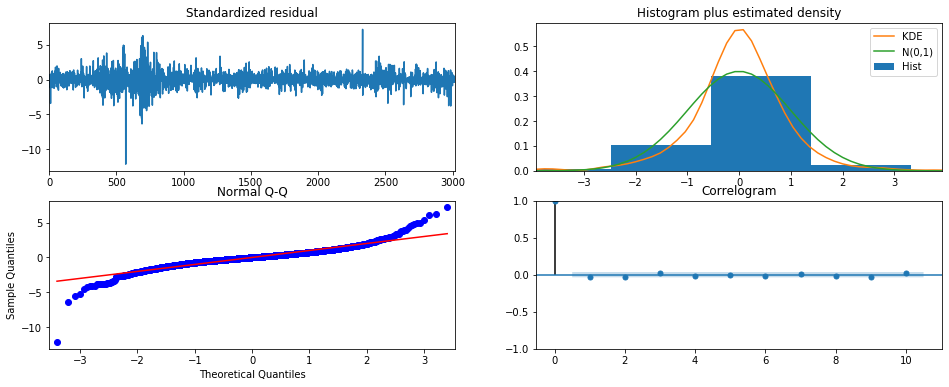

In [45]:
# Predicting closing price of ge'
train_sample = ge["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

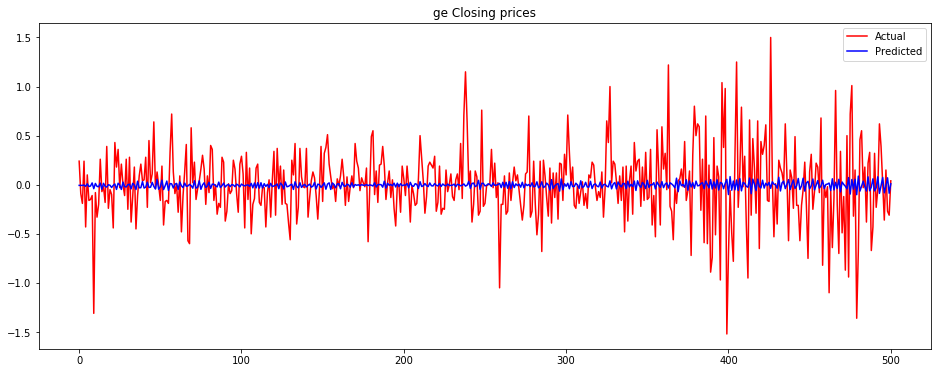

In [46]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('ge Closing prices')
plt.show()

## <a id='4.6.2'>4.6.2 Unobserved components</a>
A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series. The following model shows a possible scenario:
<img src="http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/images/etsug_ucm0134.png">
Source: [http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm](http://support.sas.com/documentation/cdl/en/etsug/66840/HTML/default/viewer.htm#etsug_ucm_details01.htm)

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood               -1431.593
Date:                Thu, 07 May 2020   AIC                           2867.187
Time:                        15:09:01   BIC                           2879.211
Sample:                             0   HQIC                          2871.510
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular     0.1506      0.001    103.410      0.000       0.148       0.153
sigma2.level      7.489e-07   8.43e-07      0.888      0.375   -9.04e-07     2.4e-06
Ljung-Box (Q):              

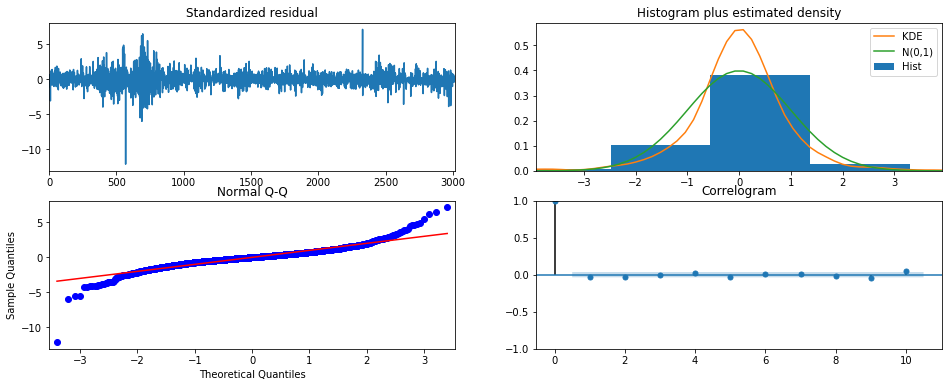

In [47]:
# Predicting closing price of ge'
train_sample = ge["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()
# calculating error
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

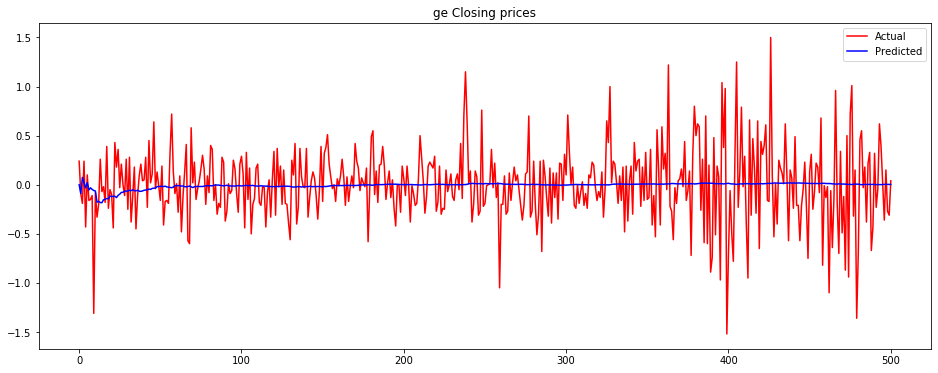

In [48]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('ge Closing prices')
plt.show()

## <a id='4.6.3'>4.6.3 Dynamic Factor models</a>
Dynamic-factor models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

I may add more regression models soon and there is much more stuff to cover. **But in my experience, the best models for time series forecasting are LSTM based Recurrent Neural Networks. I have prepared a detailed tutorial for that. Here is the link: <u>https://www.kaggle.com/thebrownviking20/intro-to-recurrent-neural-networks-lstm-gru</u>**

# 5. ML Methods

### SVM

In [49]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy import stats
import sklearn
from sklearn import *

from sklearn.svm import SVR

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [50]:
ge[2013:]

,Open,High,Low,Close,Volume,Name,Change,Return
Date,,,,,,,,
2014-01-03,27.52,27.60,27.41,27.48,27575932,GE,0.987831,-1.216893
2014-01-06,27.66,27.72,27.15,27.26,29366264,GE,1.004348,0.434783
2014-01-07,27.48,27.49,27.21,27.29,24745856,GE,0.991703,-0.829726
2014-01-08,27.35,27.36,27.12,27.21,25872072,GE,0.995271,-0.472899
2014-01-09,27.33,27.36,26.93,27.22,31319824,GE,1.000000,0.000000
...,...,...,...,...,...,...,...,...
2017-12-22,17.51,17.56,17.40,17.50,46370351,GE,0.992651,-0.734878
2017-12-26,17.45,17.66,17.40,17.43,55337926,GE,1.005695,0.569476
2017-12-27,17.46,17.63,17.31,17.38,60126681,GE,0.998301,-0.169875


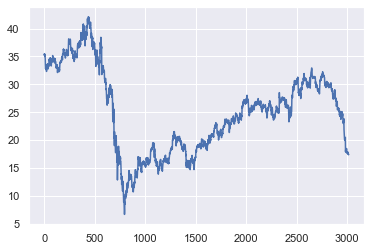

In [63]:
y = ge["Close"].iloc[1:].values
x = np.arange(0,len(y))
plt.plot(x,y)

In [64]:
x_train = x[:2012].reshape(-1,1)
x_test = x[2013:].reshape(-1,1)

In [65]:
y_train = y[:2012]
y_test = y[2013:]

In [103]:
model = svm.SVR(kernel='rbf', C=4,gamma=0.000001).fit(x_train,y_train)

In [104]:
y_pre = model.predict(x_test)

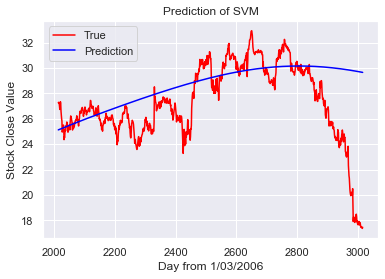

In [105]:
plt.plot(x_test,y_test,color='red', label='True')
plt.plot(x_test,y_pre,color='blue', label='Prediction')
plt.xlabel('Day from 1/03/2006')
plt.ylabel('Stock Close Value')
plt.title('Prediction of SVM')
plt.legend()

### 随机森林

In [107]:
from sklearn.ensemble.forest import RandomForestRegressor

In [127]:
rf_model = RandomForestRegressor(n_estimators=100,
                                 max_features=1, oob_score=True)

In [128]:
rf_model.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=1, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=True,
                      random_state=None, verbose=0, warm_start=False)

In [129]:
y_pre_rf = rf_model.predict(x_test)

In [130]:
x_train

array([[   0],
       [   1],
       [   2],
       ...,
       [2009],
       [2010],
       [2011]])

In [131]:
y_pre_rf

array([27.642, 27.642, 27.642, ..., 27.642, 27.642, 27.642])

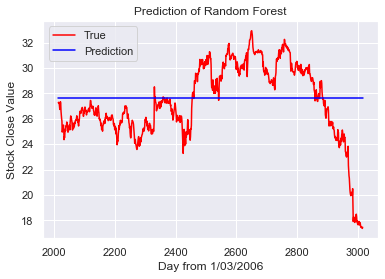

In [132]:
plt.plot(x_test,y_test,color='red', label='True')
plt.plot(x_test,y_pre_rf,color='blue', label='Prediction')
plt.xlabel('Day from 1/03/2006')
plt.ylabel('Stock Close Value')
plt.title('Prediction of Random Forest')
plt.legend()

In [135]:
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'